In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# EDA

In [2]:
df = pd.read_csv('heart.csv')

In [3]:

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:

df.shape

(918, 12)

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:

df.duplicated().sum()

np.int64(0)

<Axes: xlabel='HeartDisease'>

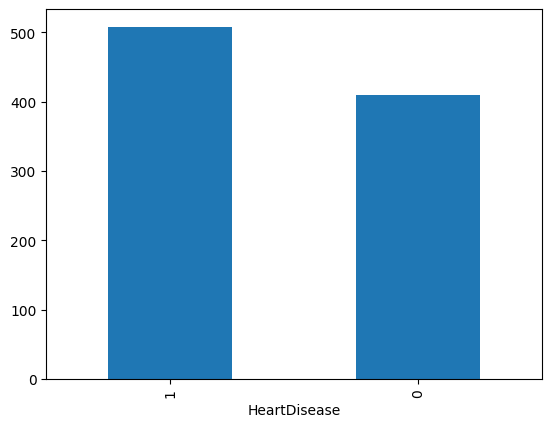

In [8]:
df['HeartDisease'].value_counts().plot(kind = 'bar')

In [9]:

df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [10]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

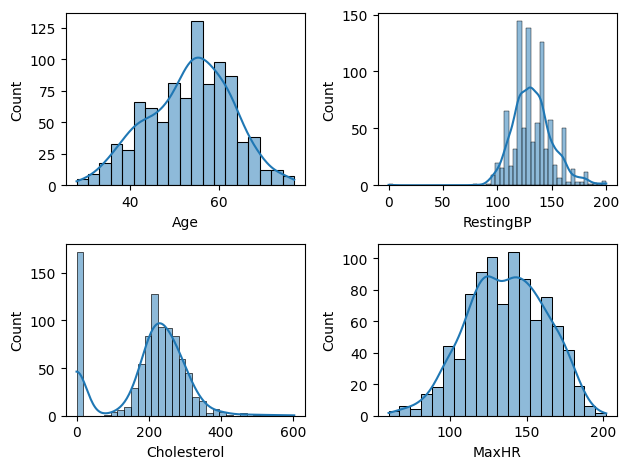

In [11]:
def plotting(var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde = True)

plotting("Age",1)
plotting("RestingBP",2)
plotting("Cholesterol",3)
plotting("MaxHR",4)

plt.tight_layout()

In [12]:

cholesterol_mean = df.loc[df['Cholesterol'] != 0, 'Cholesterol'].mean()


df['Cholesterol'] = df['Cholesterol'].replace(0, cholesterol_mean)

df['Cholesterol'] = df['Cholesterol'].round(2)

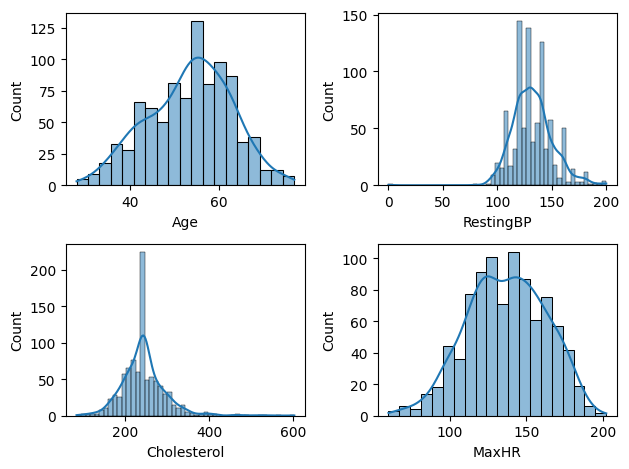

In [13]:
def plotting(var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde = True)

plotting("Age",1)
plotting("RestingBP",2)
plotting("Cholesterol",3)
plotting("MaxHR",4)

plt.tight_layout()

In [14]:

resting_bp_mean = df.loc[df['RestingBP'] != 0, 'RestingBP'].mean()

df['RestingBP'] = df['RestingBP'].replace(0, resting_bp_mean)

df['RestingBP'] = df['RestingBP'].round(2)

<Axes: xlabel='Sex', ylabel='count'>

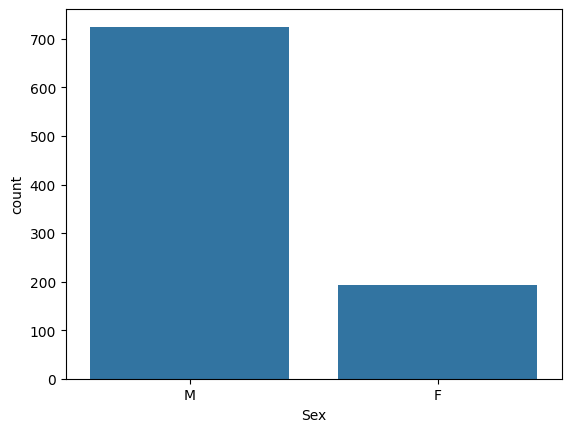

In [15]:
sns.countplot(x = df['Sex'])

<Axes: xlabel='Sex', ylabel='count'>

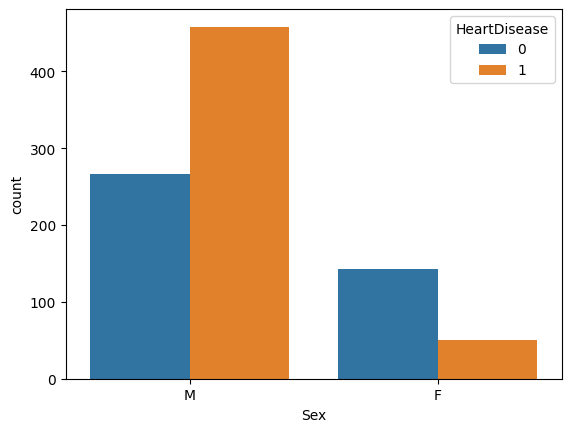

In [16]:
sns.countplot(x = df['Sex'],hue = df['HeartDisease']) 

<Axes: xlabel='ChestPainType', ylabel='count'>

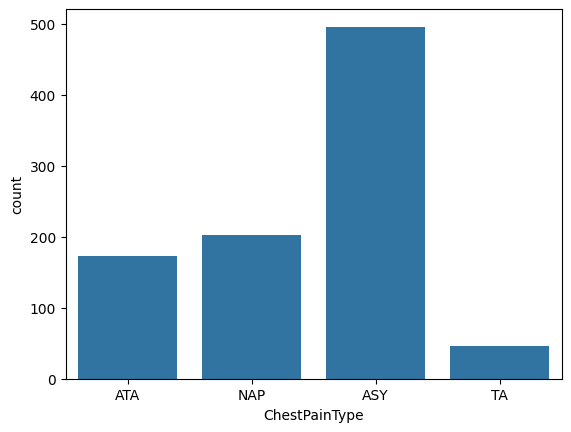

In [17]:
sns.countplot(x=df['ChestPainType'])

<Axes: xlabel='ChestPainType', ylabel='count'>

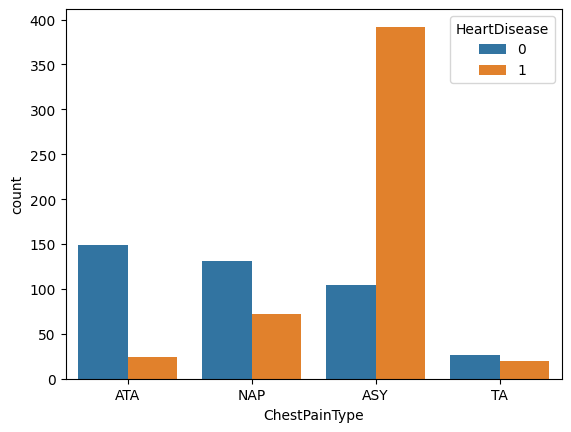

In [18]:
sns.countplot(x = df['ChestPainType'],hue = df['HeartDisease'])

<Axes: xlabel='FastingBS', ylabel='count'>

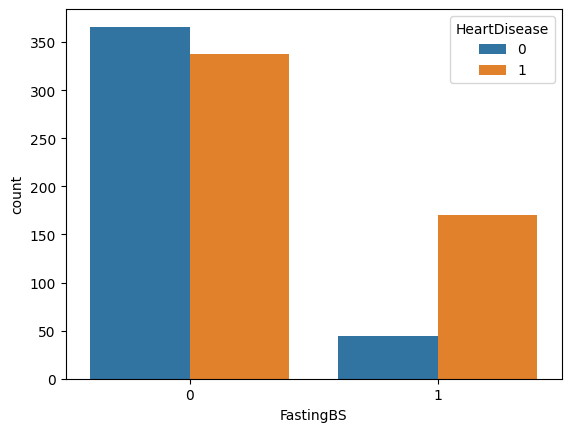

In [19]:

sns.countplot(x = df['FastingBS'],hue = df['HeartDisease'])

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

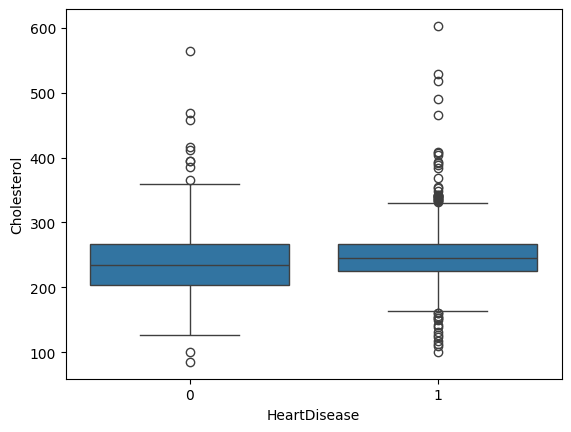

In [20]:
sns.boxplot(x='HeartDisease', y='Cholesterol', data=df)

<Axes: >

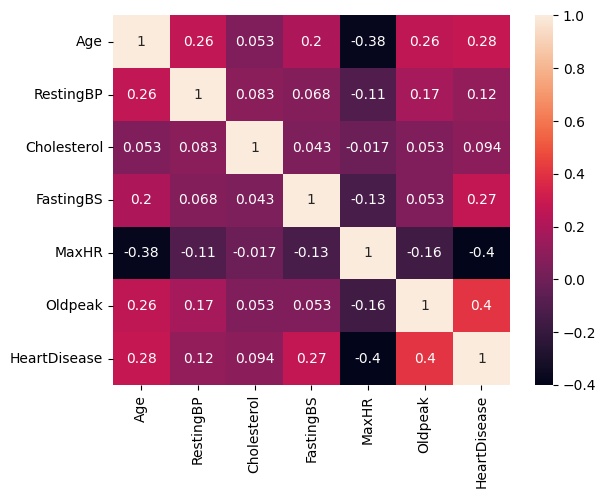

In [21]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

# Data Cleaning

In [22]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0


In [23]:
df_encoded=df.copy()

In [24]:
df_encoded.shape

(918, 12)

In [25]:
df_encoded.drop_duplicates(inplace=True)

In [26]:
df_encoded.shape

(918, 12)

In [27]:
df_encoded.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP         float64
Cholesterol       float64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

# Data Pre-Processing

In [28]:
df_encoded['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [29]:
#encoding
df_encoded['Sex']=df_encoded['Sex'].map({'M': 1, "F":0}) 

In [30]:
df_encoded.rename(columns={
    'Sex':'Sex_M'},inplace=True)

In [31]:
df_encoded.head()


,Age,Sex_M,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,0,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,1,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,0,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,1,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0


In [32]:
df_encoded['ExerciseAngina']=df_encoded['ExerciseAngina'].map({'Y': 1, "N":0}) 

In [33]:
df_encoded.rename(columns={
    'ExerciseAngina':'ExerciseAngina_Y'},inplace=True)

In [34]:
df_encoded.head()

,Age,Sex_M,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina_Y,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140.0,289.0,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160.0,180.0,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130.0,283.0,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138.0,214.0,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150.0,195.0,0,Normal,122,0,0.0,Up,0


In [35]:
df_encoded = pd.get_dummies(df_encoded,drop_first=True)

In [36]:
df_encoded.head()

,Age,Sex_M,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina_Y,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,140.0,289.0,0,172,0,0.0,0,True,False,False,True,False,False,True
1,49,0,160.0,180.0,0,156,0,1.0,1,False,True,False,True,False,True,False
2,37,1,130.0,283.0,0,98,0,0.0,0,True,False,False,False,True,False,True
3,48,0,138.0,214.0,0,108,1,1.5,1,False,False,False,True,False,True,False
4,54,1,150.0,195.0,0,122,0,0.0,0,False,True,False,True,False,False,True


In [37]:
df_encoded = df_encoded.astype(int) 

In [38]:
df_encoded.head()

,Age,Sex_M,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina_Y,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0,0,1,0,0,1,0,0,1
1,49,0,160,180,0,156,0,1,1,0,1,0,1,0,1,0
2,37,1,130,283,0,98,0,0,0,1,0,0,0,1,0,1
3,48,0,138,214,0,108,1,1,1,0,0,0,1,0,1,0
4,54,1,150,195,0,122,0,0,0,0,1,0,1,0,0,1


In [39]:
#scaling

from sklearn.preprocessing import StandardScaler

numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR']
scaler = StandardScaler()

df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])


In [40]:
df_encoded.head()

,Age,Sex_M,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina_Y,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,1,0.414885,0.834754,0,1.382928,0,0,0,1,0,0,1,0,0,1
1,-0.478484,0,1.527224,-1.210675,0,0.754157,0,1,1,0,1,0,1,0,1,0
2,-1.751359,1,-0.141284,0.722161,0,-1.525138,0,0,0,1,0,0,0,1,0,1
3,-0.584556,0,0.303651,-0.572651,0,-1.132156,1,1,1,0,0,0,1,0,1,0
4,0.051881,1,0.971054,-0.929194,0,-0.581981,0,0,0,0,1,0,1,0,0,1


# Features Selection

In [41]:
df_encoded.columns

Index(['Age', 'Sex_M', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'ExerciseAngina_Y', 'Oldpeak', 'HeartDisease', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_Normal',
       'RestingECG_ST', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [42]:
from scipy.stats import pearsonr

#------------------------
# Person Correlation Calculation
#-------------------------

selected_features =[  ## list of features
    'Age', 'Sex_M', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'Oldpeak', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'
]

correlations = {
    feature: pearsonr(df_encoded[feature], df_encoded['HeartDisease'])[0]
    for feature in selected_features
}


correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Pearson Correlation'])

correlation_df.sort_values(by='Pearson Correlation', ascending=False)

,Feature,Pearson Correlation
13,ST_Slope_Flat,0.554134
12,ExerciseAngina_Y,0.494282
6,Oldpeak,0.392385
1,Sex_M,0.305445
0,Age,0.282039
4,FastingBS,0.267291
2,RestingBP,0.117909
11,RestingECG_ST,0.102527
3,Cholesterol,0.092586
9,ChestPainType_TA,-0.054790


In [43]:
df_final =df_encoded
df_final

,Age,Sex_M,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina_Y,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,1,0.414885,0.834754,0,1.382928,0,0,0,1,0,0,1,0,0,1
1,-0.478484,0,1.527224,-1.210675,0,0.754157,0,1,1,0,1,0,1,0,1,0
2,-1.751359,1,-0.141284,0.722161,0,-1.525138,0,0,0,1,0,0,0,1,0,1
3,-0.584556,0,0.303651,-0.572651,0,-1.132156,1,1,1,0,0,0,1,0,1,0
4,0.051881,1,0.971054,-0.929194,0,-0.581981,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,1,-1.253622,0.365619,0,-0.188999,0,1,1,0,0,1,1,0,1,0
914,1.536902,1,0.637353,-0.966725,1,0.164684,0,3,1,0,0,0,1,0,1,0
915,0.370100,1,-0.141284,-2.130180,0,-0.857069,1,1,1,0,0,0,1,0,1,0
916,0.370100,0,-0.141284,-0.159813,0,1.461525,0,0,1,1,0,0,0,0,1,0


# Split the DataSet

In [44]:
from sklearn.model_selection import train_test_split


In [45]:
X=df_final.drop('HeartDisease',axis=1) 
y=df_final['HeartDisease'] 

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

# Model Selection

# 1.Model - Linern Regression

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Linear Regression Model Training

In [49]:
y_pred_LR =model_LR.predict(X_test)

In [50]:
y_pred_LR

array([-8.59744265e-02,  5.40206171e-01,  9.36905150e-01,  9.38060994e-01,
        9.01771607e-02,  8.57722130e-01,  6.84915535e-01,  1.83594948e-01,
        7.47622774e-01,  8.18099290e-01,  5.77528837e-01,  2.09419387e-01,
        6.90324099e-01,  6.43486663e-02,  9.33100054e-01,  4.54465822e-01,
        4.98476807e-03,  6.70264170e-01,  7.17670655e-01,  4.31530485e-01,
        5.96716708e-01,  7.46970028e-01,  7.15496969e-02,  6.63946345e-01,
        8.51764698e-01,  9.13946223e-01,  6.71069141e-02,  6.68169273e-01,
        2.48657329e-02,  2.23425363e-03,  6.81922931e-01,  2.42330467e-01,
        6.69461572e-01,  9.50258091e-01,  9.28518132e-01,  4.30786531e-01,
        9.67685107e-01,  7.18292885e-02,  9.46020079e-01,  6.83328326e-01,
        8.60816555e-01,  7.65143095e-01,  5.86037465e-01,  2.43393557e-01,
        1.79209313e-01,  7.29183989e-01,  7.03260309e-01,  1.06471262e+00,
        8.73879798e-01,  3.88689849e-01,  4.38427740e-02,  1.08233517e-02,
        7.27807808e-01,  

In [51]:
y_test # actual values

668    0
30     1
377    1
535    1
807    0
      ..
211    1
745    1
584    1
878    0
451    1
Name: HeartDisease, Length: 184, dtype: int64

Linear Regression model evaluation

In [52]:
from sklearn.metrics import r2_score

#calculate R^2 score
r2=r2_score(y_test, y_pred_LR)

In [53]:
r2   # here accuracy is 53%

0.5340870684974326

In [54]:
#calculated Adjusted R^2 score

n=X_test.shape[0] 
p=X_test.shape[1]  

adjusted_r2 = 1 - (1-r2)*(n-1)/(n-p-1)

In [55]:
adjusted_r2 # here accuracy is 49%

0.49248769961327477

# 2.Model- Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
model_LoR=LogisticRegression()

In [57]:
model_LoR.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Logistic Regression Model Training


In [58]:
y_pred_LoR=model_LoR.predict(X_test)

In [59]:
y_pred_LoR

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1])

Logistic Regression model evaluation

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score

In [61]:
accuracy_score(y_test,y_pred_LoR)

0.8586956521739131

In [62]:
confusion_matrix(y_test,y_pred_LoR)

array([[68,  9],
       [17, 90]])

In [63]:
print(classification_report(y_test,y_pred_LoR))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        77
           1       0.91      0.84      0.87       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



# 3. Model - KNN

In [64]:
from sklearn.neighbors import KNeighborsClassifier
model_KN=KNeighborsClassifier()

In [65]:
model_KN.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


knn model training

In [66]:
y_pred_KN=model_KN.predict(X_test)

In [67]:
y_pred_KN

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1])

knn model evaluation

In [68]:
accuracy_score(y_test,y_pred_KN)

0.8369565217391305

In [69]:
confusion_matrix(y_test,y_pred_KN)

array([[65, 12],
       [18, 89]])

In [70]:
print(classification_report(y_test,y_pred_KN));

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        77
           1       0.88      0.83      0.86       107

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.84      0.84       184



# 4. Model - Navie Bayes

In [71]:
from sklearn.naive_bayes import GaussianNB
model_NB=GaussianNB()

In [72]:
model_NB.fit(X_train,y_train)

,priors,None
,var_smoothing,1e-09


model training

In [73]:
y_pred_NB = model_NB.predict(X_test)

In [74]:
y_pred_NB

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1])

Navie model Evaluation

In [75]:
accuracy_score(y_test,y_pred_NB)

0.8478260869565217

In [76]:
confusion_matrix(y_test,y_pred_NB)

array([[69,  8],
       [20, 87]])

In [77]:
print(classification_report(y_test,y_pred_NB))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83        77
           1       0.92      0.81      0.86       107

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184



# 5. Model - Decision Tree

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
model_DT = DecisionTreeClassifier(random_state=42) 

In [80]:
model_DT.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


model training


In [81]:
y_pred_DT=model_DT.predict(X_test)

In [82]:
y_pred_DT

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1])

In [83]:
accuracy_score(y_test, y_pred_DT)

0.8152173913043478

In [84]:
confusion_matrix(y_test,y_pred_DT)

array([[67, 10],
       [24, 83]])

In [85]:
print(classification_report(y_test,y_pred_DT))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80        77
           1       0.89      0.78      0.83       107

    accuracy                           0.82       184
   macro avg       0.81      0.82      0.81       184
weighted avg       0.83      0.82      0.82       184



# 6. Model - Support Vector Machine(SVM)

In [86]:
from sklearn.svm import SVC
model_SVM=SVC(kernel='rbf')

In [87]:
model_SVM.fit(X_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


model training

In [88]:
y_pred_SVM=model_SVM.predict(X_test)

In [89]:
y_pred_SVM

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1])

Evaluating on this model

In [90]:
accuracy_score(y_test,y_pred_SVM)

0.8478260869565217

In [91]:
confusion_matrix(y_test,y_pred_SVM)

array([[64, 13],
       [15, 92]])

In [92]:
print(classification_report(y_test,y_pred_SVM))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        77
           1       0.88      0.86      0.87       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.85      0.85       184

